In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import STL

In [5]:
df = pd.read_csv("data_files/AAPL_combined.csv.gz")
AAPL_returns = pd.DataFrame({
    "time_stamp": df["Unnamed: 0"],
    "log_return": np.log(1+(df['4. close']-df['1. open'])/df['1. open'])
})
AAPL_returns['time_stamp'] = pd.to_datetime(AAPL_returns['time_stamp'], errors='coerce')
daily_variance_AAPL = AAPL_returns.groupby(AAPL_returns['time_stamp'].dt.floor("1D"))["log_return"].var()
daily_volatility_AAPL = np.sqrt(daily_variance_AAPL)

In [6]:
df = pd.read_csv("data_files/BEP_combined.csv.gz")
df.columns
BEP_returns = pd.DataFrame({
    "time_stamp": df["Unnamed: 0"],
    "log_return": np.log(1+(df['4. close']-df['1. open'])/df['1. open'])
})
BEP_returns['time_stamp'] = pd.to_datetime(BEP_returns['time_stamp'], errors='coerce')
daily_variance_BEP = BEP_returns.groupby(BEP_returns['time_stamp'].dt.floor("1D"))["log_return"].var()
daily_volatility_BEP = np.sqrt(daily_variance_BEP)


In [7]:
df = pd.read_csv("data_files/LLY_combined.csv.gz")
df.columns
LLY_returns = pd.DataFrame({
    "time_stamp": df["Unnamed: 0"],
    "log_return": np.log(1+(df['4. close']-df['1. open'])/df['1. open'])
})
LLY_returns['time_stamp'] = pd.to_datetime(LLY_returns['time_stamp'], errors='coerce')
daily_variance_LLY = LLY_returns.groupby(LLY_returns['time_stamp'].dt.floor("1D"))["log_return"].var()
daily_volatility_LLY = np.sqrt(daily_variance_LLY)


In [12]:
daily_volatility_AAPL.values

array([0.00044697, 0.00056422, 0.00043634, ..., 0.00048562, 0.00042343,
       0.00045397])

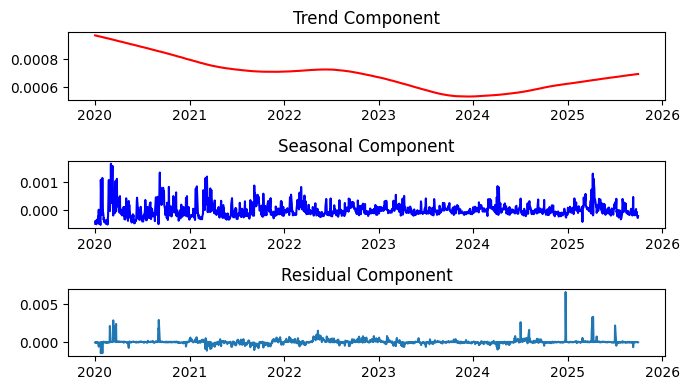

In [14]:
stl_AAPL = STL(daily_volatility_AAPL.values, period=252, robust=True)
result_AAPL = stl_AAPL.fit()
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(7, 4))

#from https://www.geeksforgeeks.org/data-analysis/seasonal-decomposition-of-time-series-by-loess-stl/
ax1.plot(daily_volatility_AAPL.index, result_AAPL.trend, label='Trend', color='red')
ax1.set_title('Trend Component')
ax2.plot(daily_volatility_AAPL.index, result_AAPL.seasonal, label='Seasonal', color='blue')
ax2.set_title('Seasonal Component')
ax3.plot(daily_volatility_AAPL.index, result_AAPL.resid, label='Residual')
ax3.set_title('Residual Component')
plt.tight_layout()
plt.show()

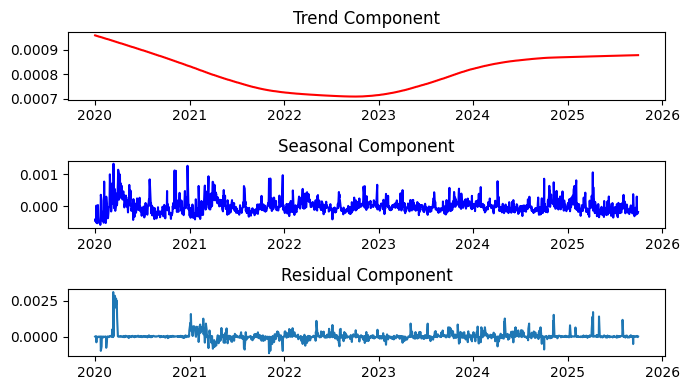

In [15]:
stl_BEP = STL(daily_volatility_BEP.values, period=252, robust=True)
result_BEP = stl_BEP.fit()
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(7, 4))

#from https://www.geeksforgeeks.org/data-analysis/seasonal-decomposition-of-time-series-by-loess-stl/
ax1.plot(daily_volatility_BEP.index, result_BEP.trend, label='Trend', color='red')
ax1.set_title('Trend Component')
ax2.plot(daily_volatility_BEP.index, result_BEP.seasonal, label='Seasonal', color='blue')
ax2.set_title('Seasonal Component')
ax3.plot(daily_volatility_BEP.index, result_BEP.resid, label='Residual')
ax3.set_title('Residual Component')
plt.tight_layout()
plt.show()

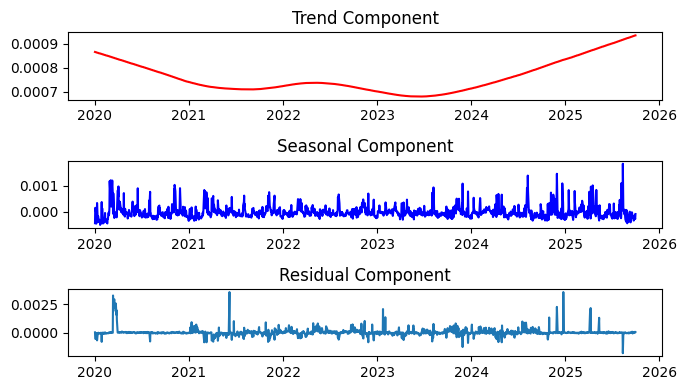

In [16]:
stl_LLY = STL(daily_volatility_LLY.values, period=252, robust=True)
result_LLY = stl_LLY.fit()
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(7, 4))

#from https://www.geeksforgeeks.org/data-analysis/seasonal-decomposition-of-time-series-by-loess-stl/
ax1.plot(daily_volatility_LLY.index, result_LLY.trend, label='Trend', color='red')
ax1.set_title('Trend Component')
ax2.plot(daily_volatility_LLY.index, result_LLY.seasonal, label='Seasonal', color='blue')
ax2.set_title('Seasonal Component')
ax3.plot(daily_volatility_LLY.index, result_LLY.resid, label='Residual')
ax3.set_title('Residual Component')
plt.tight_layout()
plt.show()

In [20]:
q1_AAPL, q3_AAPL = np.percentile(result_AAPL.resid, [25,75])
iqr_AAPL = q3_AAPL - q1_AAPL
AAPL_resid_filtered = result_AAPL.resid[(result_AAPL.resid<=(q3_AAPL+1.5*iqr_AAPL)) & (result_AAPL.resid>=(q1_AAPL+1.5*iqr_AAPL))]
AAPL_resid_filtered

array([0.00017913, 0.00012045, 0.00021794, 0.00015148, 0.00012839,
       0.00012516, 0.00017227, 0.00016174, 0.00020412, 0.00016758,
       0.00022036, 0.00012546, 0.00012403, 0.0001516 , 0.00013511,
       0.00019668, 0.00014058, 0.0001959 , 0.00022538, 0.00014892,
       0.00021301, 0.00014461, 0.0001394 , 0.00018819, 0.0001287 ,
       0.00013951, 0.00014825, 0.00012054, 0.00013794, 0.00012707,
       0.00012588, 0.00015939, 0.00016415, 0.00020292, 0.00020363,
       0.00013321, 0.0001241 , 0.00013424, 0.00013909, 0.00012274,
       0.00015271, 0.00016702, 0.00020743, 0.00012769, 0.00015462,
       0.00011571, 0.00013958, 0.0001784 , 0.00018247, 0.00016169,
       0.00022025, 0.00016996, 0.00021443, 0.00016477, 0.00021593,
       0.00020399, 0.0001765 , 0.00016046, 0.00015248, 0.00014458,
       0.00014888, 0.00012619, 0.00016529, 0.00016786, 0.00015101,
       0.00020748, 0.00016024, 0.00015046, 0.00016105, 0.00015618,
       0.00015402, 0.00014608, 0.00018721, 0.00012517, 0.00014

In [21]:
q1_BEP, q3_BEP = np.percentile(result_BEP.resid, [25,75])
iqr_BEP = q3_BEP - q1_BEP
BEP_resid_filtered = result_BEP.resid[(result_BEP.resid<=(q3_BEP+1.5*iqr_BEP)) & (result_BEP.resid>=(q1_BEP+1.5*iqr_BEP))]
BEP_resid_filtered

array([1.04498921e-04, 1.58219671e-04, 1.61218138e-04, 1.22750381e-04,
       1.68721647e-04, 1.42458247e-04, 1.78762092e-04, 1.21354685e-04,
       1.60823498e-04, 1.14020055e-04, 1.43589803e-04, 1.00383570e-04,
       9.51921775e-05, 1.35295938e-04, 1.13549333e-04, 1.10597895e-04,
       1.32126592e-04, 1.25231017e-04, 1.07633931e-04, 1.33990585e-04,
       1.30982239e-04, 1.02204467e-04, 9.50151138e-05, 9.46638223e-05,
       1.04683501e-04, 1.58912144e-04, 1.08032114e-04, 1.05952558e-04,
       1.50034134e-04, 1.09255003e-04, 1.51204375e-04, 1.03745630e-04,
       1.50106661e-04, 1.24220016e-04, 1.08339766e-04, 1.57109480e-04,
       1.02598357e-04, 1.58929383e-04, 1.28892495e-04, 1.13418921e-04,
       1.16553820e-04, 1.32881423e-04, 1.36735511e-04, 1.39603609e-04,
       1.28903158e-04, 1.09297776e-04, 1.06170881e-04, 1.36980192e-04,
       1.38958888e-04, 9.97275507e-05, 1.12485452e-04, 1.54015816e-04,
       1.12668167e-04, 1.30796668e-04, 1.07152085e-04, 1.10760245e-04,
      

In [22]:
q1_LLY, q3_LLY = np.percentile(result_LLY.resid, [25,75])
iqr_LLY = q3_LLY - q1_LLY
LLY_resid_filtered = result_LLY.resid[(result_LLY.resid<=(q3_LLY+1.5*iqr_LLY)) & (result_LLY.resid>=(q1_LLY+1.5*iqr_LLY))]
LLY_resid_filtered

array([0.00011438, 0.00016852, 0.00022177, 0.0001655 , 0.00014774,
       0.00013304, 0.0001455 , 0.00015798, 0.00014119, 0.00017453,
       0.00012979, 0.00012588, 0.00022265, 0.00012019, 0.00014995,
       0.00018325, 0.00020033, 0.00012266, 0.00014901, 0.0001415 ,
       0.0001377 , 0.00012624, 0.00015979, 0.00014703, 0.00019613,
       0.00013694, 0.00018617, 0.00012368, 0.00018778, 0.00016814,
       0.00011737, 0.00011409, 0.00013537, 0.00012564, 0.00013474,
       0.00013481, 0.00012149, 0.00012282, 0.00014436, 0.00014919,
       0.00012153, 0.00019437, 0.00021676, 0.00018087, 0.00014903,
       0.00012029, 0.00011938, 0.00017278, 0.00011457, 0.00021928,
       0.00012431, 0.00014418, 0.00012675, 0.00011889, 0.00012137,
       0.00017584, 0.00018058, 0.00012437, 0.00016748, 0.00015522,
       0.00016567, 0.00013832, 0.0001647 , 0.00020192, 0.00012314,
       0.00013107, 0.00012139, 0.00018233, 0.00016755, 0.00015549,
       0.00013013, 0.00022265, 0.00011441, 0.00012942, 0.00014